<a href="https://colab.research.google.com/github/shyamalkar/2025_ML_Repository/blob/main/project_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`First of all Download the data`***

In [ ]:
#import library
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
fetch_housing_data()

/tmp/ipython-input-3031952653.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


    # ***`Take a quick look at the data data structure`***

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# ***`Housing info`***


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**There are 20640 instance in the dataset, which means that it is fairly small by Machine learning standards but its perfect to get started, Notice that total_bedrooms attribute has only 20433 non-null values, meaning that 207. districts are missing this feature.**

**Value counts method**

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


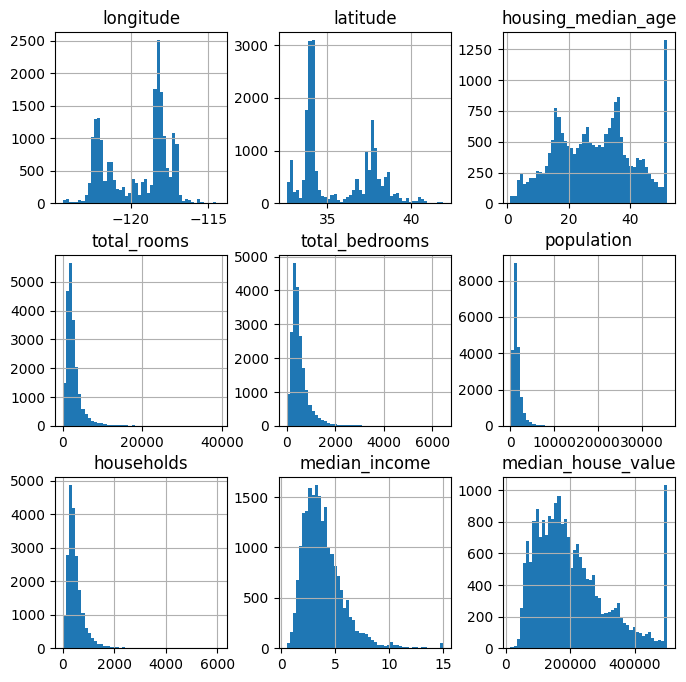

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(8, 8))
plt.show()

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]



In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**3

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

**Unfortunantly, the housing dataset doesnot have an identifier column. The simplest soluation is to use the row index as the id**

In [ ]:
housing_with_id = housing.reset_index() #adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id (housing_with_id, 0.2, "id")

##

#sklearn.model selection

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

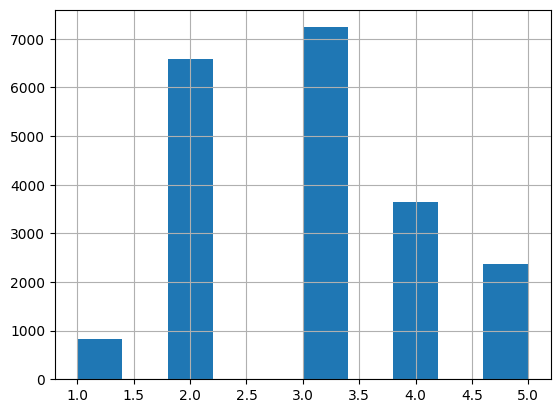

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts() / len (strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis= 1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

# ***`Visualizing Geographical Data`***

**A geographical scatterplot of the data This look California right ** ?

<Axes: xlabel='longitude', ylabel='latitude'>

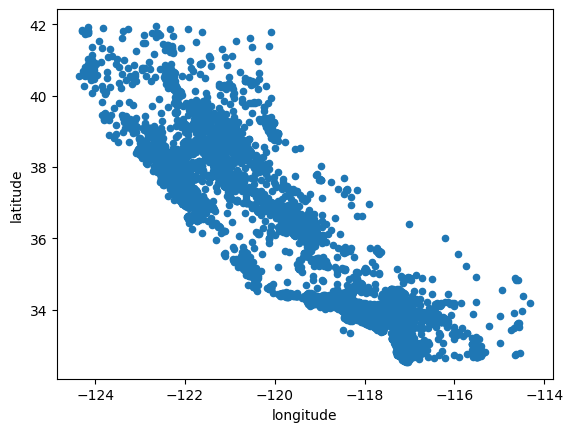

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

**"It's very very hard to understand to see any particular pattern. setting the alpha optionn 0.1 makes it much easier to visualize the places where there is a high density of data points"**

<Axes: xlabel='longitude', ylabel='latitude'>

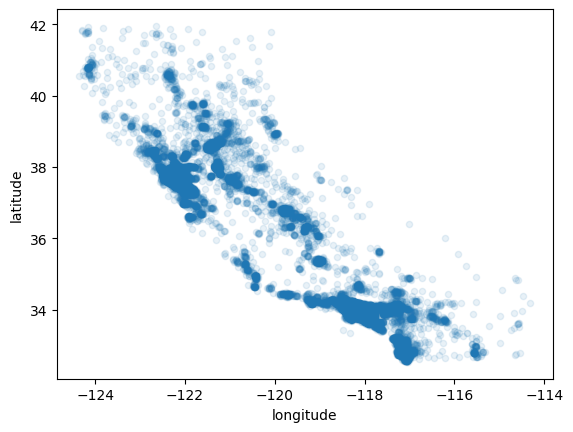

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

**A better visualization highlighting high-density areas**

<Axes: xlabel='longitude', ylabel='latitude'>

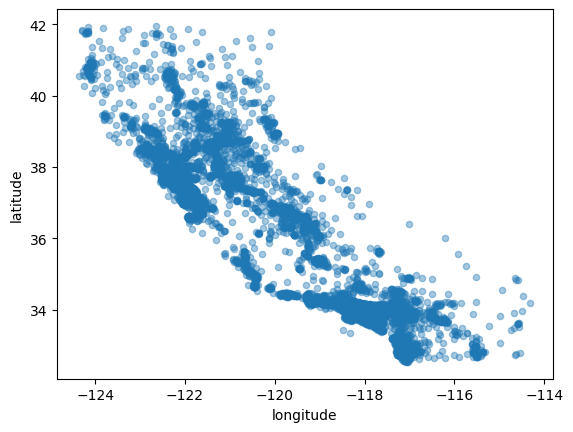

In [ ]:
housing.plot(kind="scatter", x="longitude", y='latitude', alpha=0.4, )

**California Housing price**

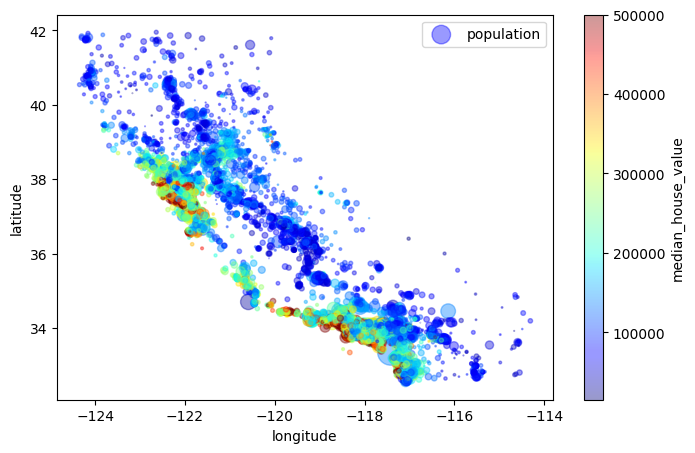

In [ ]:
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(8,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# ***Looking for correlation***

**This book some error so i fixed this in morden art**

In [ ]:
import numpy as np #import numpy as np

# only under numeric column correlation out .

corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

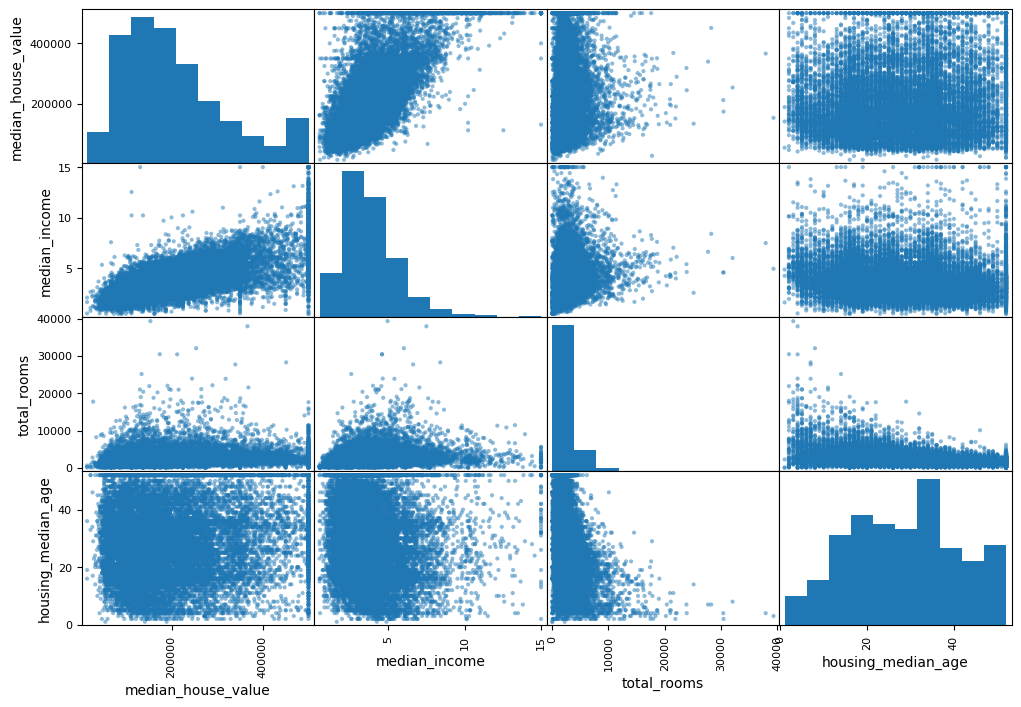

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]


scatter_matrix(housing[attributes], figsize=(12,8))


**Scatter matrix**

# ***`The most promising attribute to predict the median house value is the median income , so let's zoom in on their correlation scatterplot`***

<Axes: xlabel='median_income', ylabel='median_house_value'>

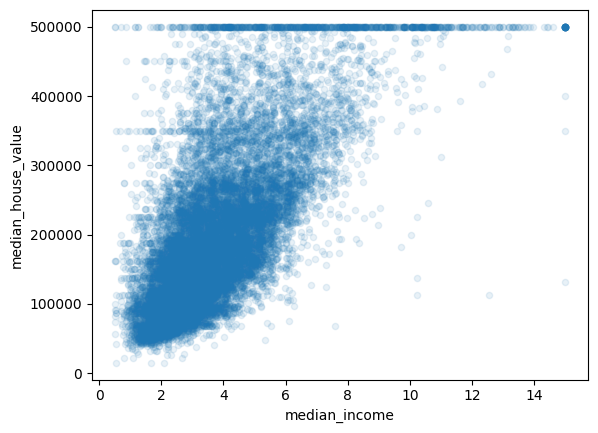

In [ ]:
housing.plot(kind="scatter", x="median_income" , y = "median_house_value", alpha = 0.1)

# ***`Experiment with attribute combination`***

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

***`And now let's look at the correlation matrix again`***

**In this coding we replace some coding feature, beacause thsi book (Hands-on machine learning with scikit-learn, Keras & tensorflow - Aurelion geron 2019 2nd edition), so in this book very old coding methos use , and now 2025 after 6 years later coding hase been changed. **

In [ ]:
import numpy as np

# only inside of numeric column collect correlation
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

# Now see correlation
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


# ***`prepare the data for Machine learning algorithms`***

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

 ***`Data cleaning`***

**Most machine learning algorithms cannot work with missing feature, so let's create a few funstions to take care of them,
I have only 3 option -

No1 = dropna()
No2 = drop()
No3 = fillna()**

In [ ]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) #option 2
median = housing["total_bedrooms"].median() #Option 3
housing.fillna({"total_bedrooms": median}, inplace=True)


# ***`Scikit-learn provides a handy class to take care of missing values:`***

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

***Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity***

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

**Now you can fit the imputer instance to the training data using the fit() method:**

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

**Now you can use this "trained" imputer to transform the training set by replacing missing values by the learned medians**

In [ ]:
x = imputer.transform(housing_num)

***The result is a plain Numpy array containing the transformed features. if you want to put it back into a pandas Dataframe, it's simple***

In [ ]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

# ***`Handling Text and categorical attributes`***

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


***`Most Machine learning algorithms prefer to work with numbers anyway , so let's convert these categories from text to numbers. For this we can use Scikit-learn Ordina LEncoder class`***


** In this coding element i add mordern coding feature we select only OrdinalEncoder so i changed and add "ocean proximity"**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

Ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = Ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
Ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Basically , and the matrix is full of zeros except for a singel 1 per row , if i use it mostly like a normal 2D array, but if you really want to convert it to a dense Numpy array, just call the toarray() method **

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

**Once again, you can get the list of categories using the encoder's categories_instance variance**

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#Custom Transformers
**scikit leanr provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specififc attributes, i will need is to creatre a class and impliment three methods, fit(), (returning self), transform(), and fit_transform(),and if i add BaseEstimator as a base class i will get two extramethods {(get_params() and set_params())} that will be usefull for for automatic #hyperparameter tuning**

**Here is a small transformer class that adds the combined attributes we. discussed earlier:**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit (self, x, y=None):
    return self #Nothing else to do
  def transform(self, x, y=None):
    rooms_per_household = x[:, rooms_ix] / x[:, households_ix]
    population_per_household = x[:, population_ix] / x[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = x [:, bedrooms_ix] / x[:, rooms_ix]
      return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]

    else:
      return np.c_[x, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


# ***`feature scaling`***

One of the most important transformations you need to apply to your data is feature
scaling

# ***`Transformation pipeline`***
**There are many data transformation steps that need to be executed in the right order. fortunantly, Scikit-learn provides the pipeline class to help with such sequence of transformation. Here is a small pipeline for the numerical attributes .**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

**In version 0.20, Scikit-Learn introduced the columnTransformer for this purpose , and the good news is that it works great with PandasDataFrames. Let's use it apply all the transformations to the housing data:**

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),

])
housing_prepared = full_pipeline.fit_transform(housing)


## Selext a Train a Model
**Now i am ready to selected and train a machine learning model .**



# ***`Training and Evaluating on the Training set`***

**Let's first train a Linear Regression model, like we did in the previous chapter**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

**I have done a working Linear Regression model. Let's try it out on a few instances from training set:**

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


**Actual:    [72100, 279600, 82700, 112500, 238300].
Predicted: [85657, 305492, 152056, 186095, 244550]
**

***`Let's measure this regression model's RMSE on the whole training set using SCikit-Learn mean_squared_error function:`***

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

***`Let's train a DecisionTreeRegressor.This is a powerful model, capable of finding complexx nonlinear relationships in the data (Decision Trees are presented in more detail in)`***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

**Now that the model is trained, Let's evaluate it on the training set:**

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

***`Batter Evaluating Using Cross-Validation`***

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:",scores.std())

display_scores(tree_rmse_scores)

Scores: [73225.16582824 71708.3592249  69054.49955612 70942.01402646
 68720.17559388 78197.36640444 69732.09862294 72358.70903288
 67998.42406545 70652.09536056]
Mean: 71258.89077158888
Standard deviation: 2795.622795341338


**Let's compute the same scores for the LInearRegression model just to be sure:**

In [ ]:
lin_scores = cross_val_score(lin_reg,
                             housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error",
                             cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [ ]:
import joblib

joblib.dump(lin_reg, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")

import joblib

my_model = lin_reg

# save the model
joblib.dump(my_model, "my_model.pkl")

# and later...
my_model_loaded = joblib.load("my_model.pkl")


***`Fine-Tune my model`**

**Let's assume that i now  have a shortlist of promising models. i now nees to fine tune them . let's look at a few ways i can do that. **

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 3, 4]},

]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],
  cvres['params']):

  print(np.sqrt(-mean_score), params)

63434.52147415125 {'max_features': 2, 'n_estimators': 3}
55737.456969442814 {'max_features': 2, 'n_estimators': 10}
52482.54899290024 {'max_features': 2, 'n_estimators': 30}
60805.74550009912 {'max_features': 3, 'n_estimators': 3}
53978.7371320026 {'max_features': 3, 'n_estimators': 10}
51164.968518407964 {'max_features': 3, 'n_estimators': 30}
60209.14478122228 {'max_features': 4, 'n_estimators': 3}
52916.20200395643 {'max_features': 4, 'n_estimators': 10}
50224.80811043751 {'max_features': 4, 'n_estimators': 30}


***`Randomized Search`***

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances


array([8.84214052e-02, 8.55608058e-02, 4.49127319e-02, 2.27936666e-02,
       1.96521327e-02, 2.29857334e-02, 2.05237160e-02, 2.92040495e-01,
       6.90457496e-02, 9.99985362e-02, 8.65152775e-02, 3.05877327e-02,
       1.00612933e-01, 6.38421054e-05, 5.17890702e-03, 1.11063350e-02])

**Let's display these importance scores next to their corresponding attribute names:**

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.2920404954204042), 'median_income'),
 (np.float64(0.10061293287725935), 'INLAND'),
 (np.float64(0.09999853616554483), 'pop_per_hhold'),
 (np.float64(0.08842140519970101), 'longitude'),
 (np.float64(0.0865152775167361), 'bedrooms_per_room'),
 (np.float64(0.08556080578289559), 'latitude'),
 (np.float64(0.06904574957266522), 'rooms_per_hhold'),
 (np.float64(0.044912731906266996), 'housing_median_age'),
 (np.float64(0.030587732729429613), '<1H OCEAN'),
 (np.float64(0.022985733427852078), 'population'),
 (np.float64(0.022793666569561184), 'total_rooms'),
 (np.float64(0.020523716004791432), 'households'),
 (np.float64(0.01965213274657712), 'total_bedrooms'),
 (np.float64(0.01110633495515027), 'NEAR OCEAN'),
 (np.float64(0.005178907019734448), 'NEAR BAY'),
 (np.float64(6.384210543062295e-05), 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()


x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45942.51387375, 49851.85072561])

# ***`Deployment`***
**We can't Deploy the model in Google colab , Deployment, Monitor, Maintanance, those three tep son't done in colab so we worked those three step in VScode**



In [ ]:
!pip install streamlit